Electric vehicle market segmentation

In [10]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Loading the data set

In [11]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Electrical Vehicle Trend from year 2000-2025.xlsx')
df1.head()

,Year,State,Broad Category,EV vehicle registered,Share of EV in total vehicle registered (%)
0,2000-01,Andaman and Nicobar Islands,2 Wheeler,0.0,0.00
1,2000-01,Andhra Pradesh,2 Wheeler,0.0,0.00
2,2000-01,Arunachal Pradesh,2 Wheeler,0.0,0.00
3,2000-01,Assam,2 Wheeler,1.0,0.01
4,2000-01,Bihar,2 Wheeler,0.0,0.00


In [12]:
# loading dataset 2
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ICE_&_EV_Vehicle_Registerations from year 2000-2025.xlsx')
df2.head()

,Year,State,Broad Category,Fuel Category,Registered Vehicle
0,2000-01,Andaman and Nicobar Islands,2 Wheeler,CNG,0.0
1,2000-01,Andhra Pradesh,2 Wheeler,CNG,0.0
2,2000-01,Arunachal Pradesh,2 Wheeler,CNG,0.0
3,2000-01,Assam,2 Wheeler,CNG,2.0
4,2000-01,Bihar,2 Wheeler,CNG,0.0


In [13]:
# loading data set 3
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ev_sales_by_makers_and_cat_15-24.csv')
df3.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


**Exploratory Data Analysis (EDA)**

In [14]:
# Analysing all the data sets
# checking the shape of the data sets (number of rows and columns)
print("DF1 Shape:",df1.shape)
print("DF2 Shape:",df2.shape)
print("DF3 Shape:",df3.shape)

DF1 Shape: (10504, 5)
DF2 Shape: (52504, 5)
DF3 Shape: (1386, 12)


In [15]:
# now checking the info of the datasets
print("dataset 1 info:")
print(df1.info())
print("dataset 2 info:")
print(df2.info())
print("dataset 3 info:")
print(df3.info())

dataset 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10504 entries, 0 to 10503
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         10503 non-null  object 
 1   State                                        10500 non-null  object 
 2   Broad Category                               10500 non-null  object 
 3   EV vehicle registered                        10500 non-null  float64
 4   Share of EV in total vehicle registered (%)  10500 non-null  float64
dtypes: float64(2), object(3)
memory usage: 410.4+ KB
None
dataset 2 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52504 entries, 0 to 52503
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                52503 non-null  object 
 1   State               525

In [16]:
# stastical summary of the datasets
print("dataset 1 summary:")
print(df1.describe())
print("dataset 2 summary:")
print(df2.describe())
print("dataset 3 summary:")
print(df3.describe())

dataset 1 summary:
       EV vehicle registered  Share of EV in total vehicle registered (%)
count           10500.000000                                 10500.000000
mean              557.227619                                     1.066754
std              6496.759608                                     7.254675
min                 0.000000                                     0.000000
25%                 0.000000                                     0.000000
50%                 0.000000                                     0.000000
75%                 0.000000                                     0.000000
max            246749.000000                                   100.000000
dataset 2 summary:
       Registered Vehicle
count        5.250000e+04
mean         7.031360e+03
std          7.226392e+04
min          0.000000e+00
25%          0.000000e+00
50%          0.000000e+00
75%          6.600000e+01
max          2.905825e+06
dataset 3 summary:
              2015          2016          2

<ipython-input-17-fcc0af07a692>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df3, y = df3['Cat'].sort_values(ascending=True), x = '2024', palette = 'viridis')


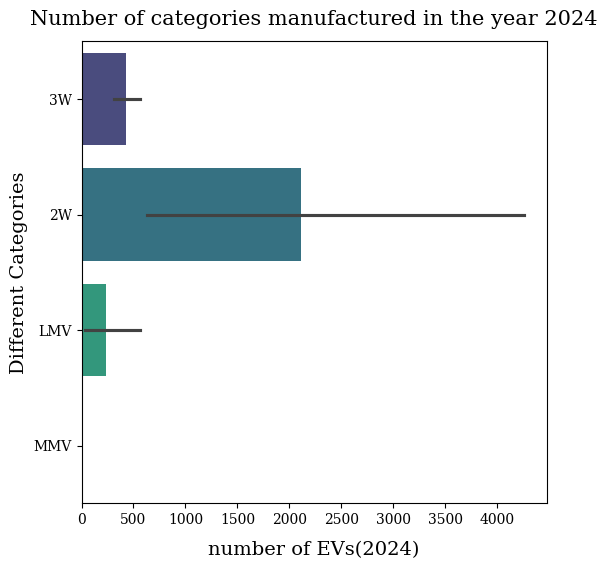

In [17]:
# analysing 2 wheelers data
# 2 wheelers data visuvalisation from dataset 3
plt.figure(figsize=(6,6))
sns.barplot(data = df3, y = df3['Cat'].sort_values(ascending=True), x = '2024', palette = 'viridis')
plt.ylabel('Different Categories', fontsize = 14, family = 'serif')
plt.xlabel('number of EVs(2024)', fontsize = 14, family = 'serif',labelpad = 10)
plt.xticks(family = 'serif')
plt.yticks(family = 'serif')
plt.title(label='Number of categories manufactured in the year 2024', weight = 200, family = 'serif', size = 15, pad = 12)
plt.show()

<ipython-input-18-d722b0fa774c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df2, y = df2['Fuel Category'].sort_values(ascending=True), x = 'Registered Vehicle', palette = 'viridis')


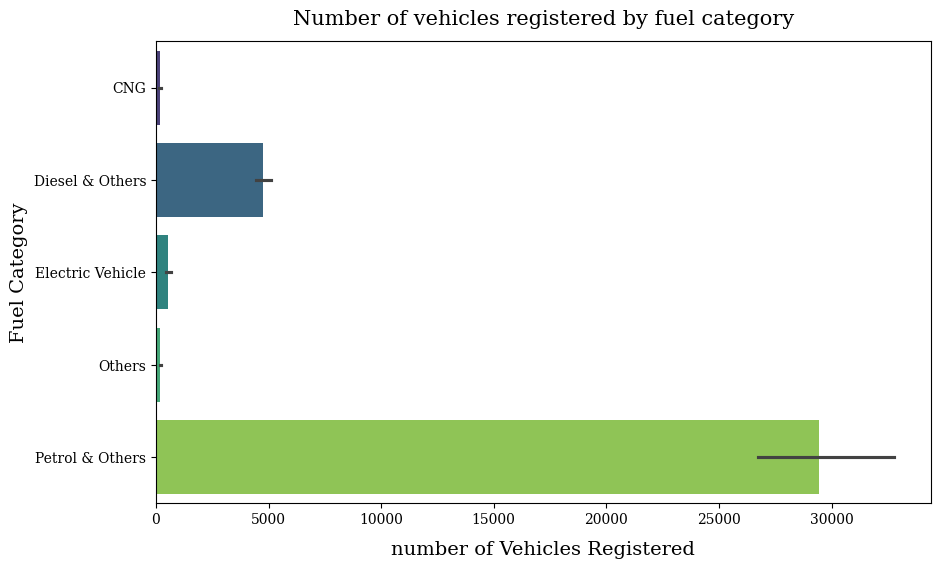

In [18]:
 # plot for number of vehicle registered by fuel category over the years
plt.figure(figsize=(10,6))
sns.barplot(data = df2, y = df2['Fuel Category'].sort_values(ascending=True), x = 'Registered Vehicle', palette = 'viridis')
plt.ylabel('Fuel Category', fontsize = 14, family = 'serif')
plt.xlabel('number of Vehicles Registered', fontsize = 14, family = 'serif',labelpad = 10)
plt.xticks(family = 'serif')
plt.yticks(family = 'serif')
plt.title(label='Number of vehicles registered by fuel category', weight = 200, family = 'serif', size = 15, pad = 12)
plt.show()

<ipython-input-19-edc6da5feed2>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Year', 'Fuel Category'], as_index=False)['Registered Vehicle']
<ipython-input-19-edc6da5feed2>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


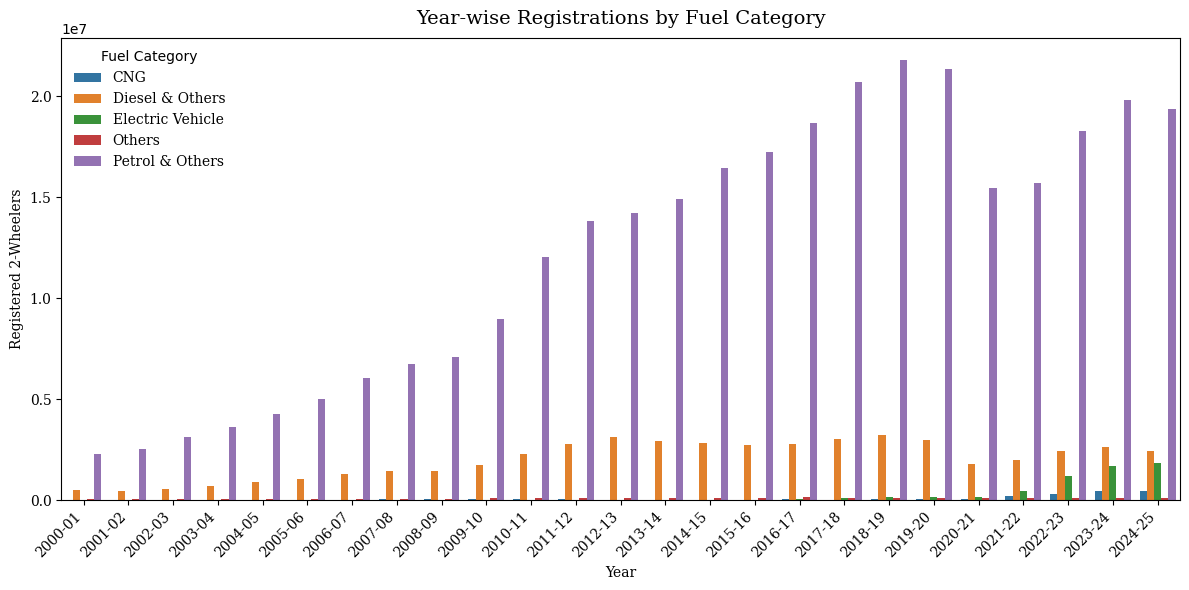

In [19]:
mask = df2['Year'].astype(str).str.match(r'^\d{4}(?:-\d{2})?$')
df2 = df2[mask].copy()


df2['Year'] = pd.Categorical(df2['Year'],
                             sorted(df2['Year'].unique()),
                             ordered=True)


agg = (
    df2
    .groupby(['Year', 'Fuel Category'], as_index=False)['Registered Vehicle']
    .sum()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=agg,
    x='Year',
    y='Registered Vehicle',
    hue='Fuel Category',
    ci=None
)
plt.xlabel('Year',  family='serif')
plt.ylabel('Registered 2-Wheelers', family='serif')
plt.title('Year-wise Registrations by Fuel Category', family='serif', size=14, pad=10)
plt.xticks(rotation=45, ha='right', family='serif')
plt.yticks(family='serif')
plt.legend(title='Fuel Category', frameon=False, prop={'family':'serif'})
plt.tight_layout()
plt.show()

from the figure we can see that the spike in EV adoption among other vehicles has been on the rise from year 2021 and is continuing to grow.

<ipython-input-20-1c0d33d114cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df1, y = df1['State'].sort_values(ascending=True), x = 'EV vehicle registered', palette = 'viridis')


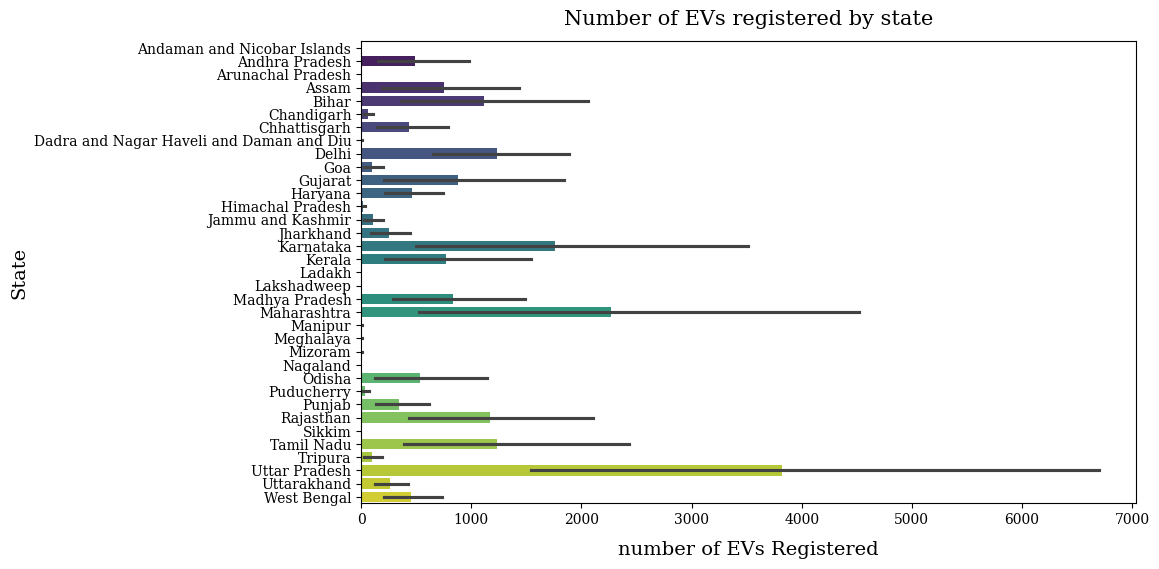

In [20]:
# visualising the state wise vehicle categories from dataset 1 (df1)
plt.figure(figsize=(10,6))
sns.barplot(data = df1, y = df1['State'].sort_values(ascending=True), x = 'EV vehicle registered', palette = 'viridis')
plt.ylabel('State', fontsize = 14, family = 'serif')
plt.xlabel('number of EVs Registered', fontsize = 14, family = 'serif',labelpad = 10)
plt.xticks(family = 'serif')
plt.yticks(family = 'serif')
plt.title(label='Number of EVs registered by state', weight = 200, family = 'serif', size = 15, pad = 12)
plt.show()

from the data above uttar pradesh has the fastest growing EV adoption followed by Maharastra and Karnataka

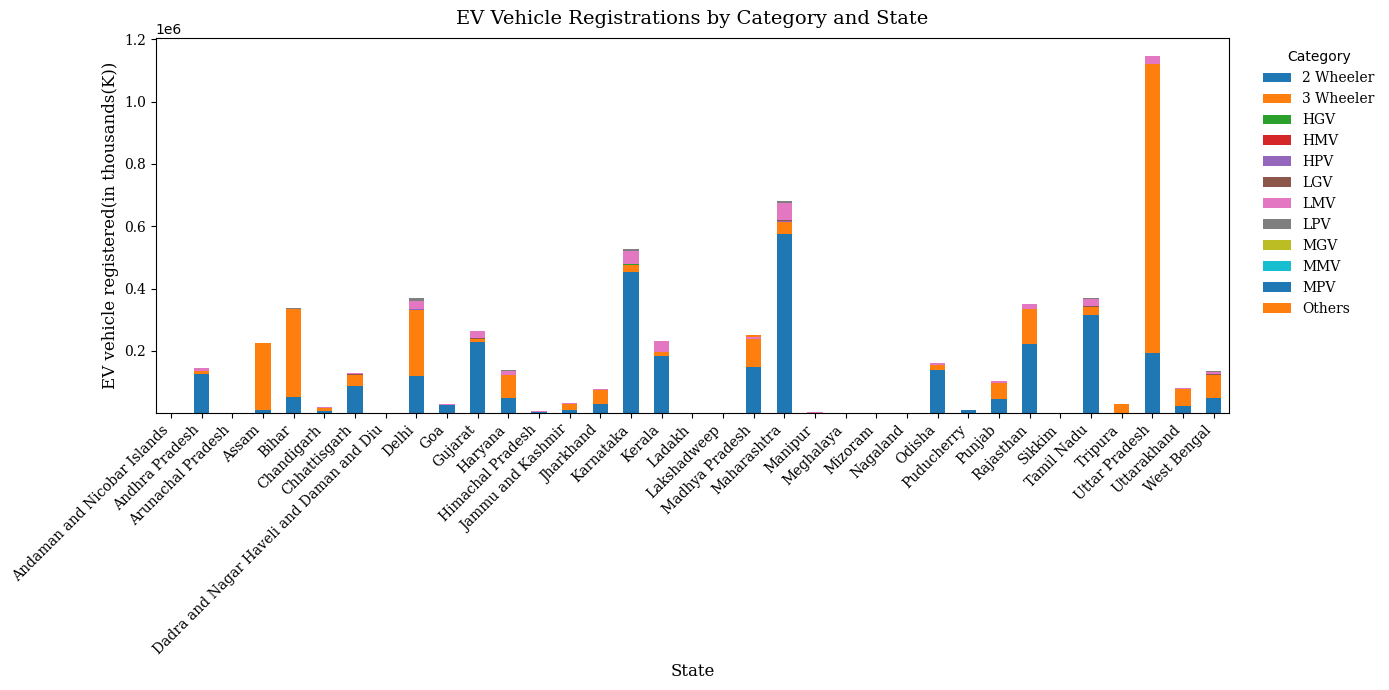

In [21]:


# 3) Aggregate by state & category
state_cat = (
    df1
    .groupby(['State', 'Broad Category'], as_index=False)['EV vehicle registered']
    .sum()
)

# 4) Pivot to wide form
state_cat_pivot = state_cat.pivot(
    index='State',
    columns='Broad Category',
    values='EV vehicle registered'
).fillna(0)

# 5) Plot stacked bars
ax = state_cat_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7)
)
ax.set_xlabel('State', family='serif', fontsize=12)
ax.set_ylabel('EV vehicle registered(in thousands(K))', family='serif', fontsize=12)
ax.set_title('EV Vehicle Registrations by Category and State', family='serif', fontsize=14, pad=10)
plt.xticks(rotation=45, ha='right', family='serif')
plt.yticks(family='serif')
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, prop={'family':'serif'})
plt.tight_layout()
plt.show()


for the 2 wheelers Maharastra and Karnataka has more number of adopters, for 3 wheelers Uttar pradesh, Assam and Bihar have higher adoption Rate

In [22]:
# Melt the year columns into a single 'Year' and 'Value' column
df_melted = df3.melt(id_vars=['Cat', 'Maker'],
                    value_vars=[str(year) for year in range(2015, 2024)],
                    var_name='Year',
                    value_name='Number_of_Vehicles')

print(df_melted.head())

  Cat                          Maker  Year  Number_of_Vehicles
0  3W    "VOLVO GROUP INDIA PVT LTD"  2015                   0
1  3W         3EV INDUSTRIES PVT LTD  2015                   0
2  2W         3GB TECHNOLOGY PVT LTD  2015                   0
3  3W         3GB TECHNOLOGY PVT LTD  2015                   0
4  3W  3S INDUSTRIES PRIVATE LIMITED  2015                   0


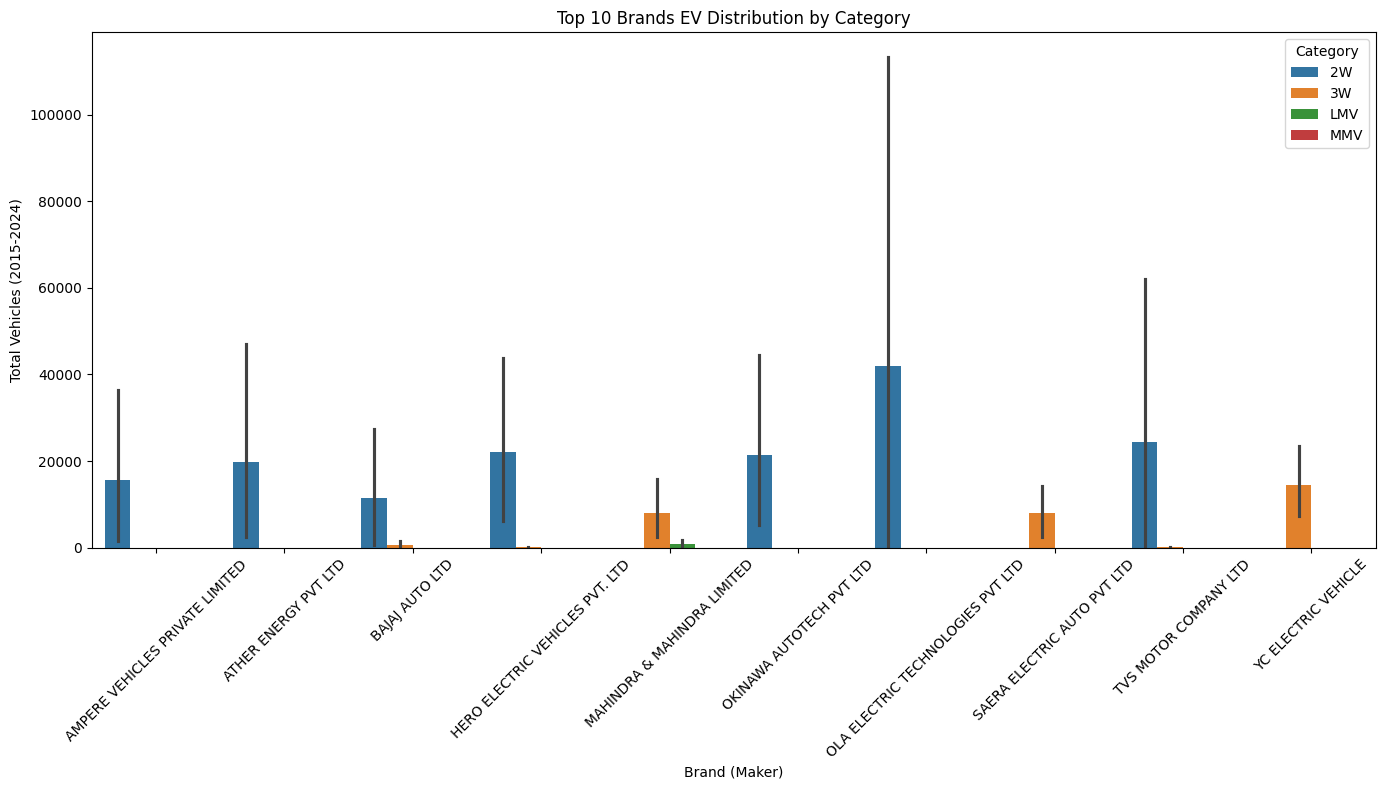

In [23]:
# Group and sort by total vehicles
grouped = df_melted.groupby('Maker')['Number_of_Vehicles'].sum().sort_values(ascending=False).reset_index()

# Select Top 10 Brands
top_brands = grouped.head(10)['Maker'].tolist()

# Filter only top brands
df_top = df_melted[df_melted['Maker'].isin(top_brands)]

# Now plot brand-wise by category
plt.figure(figsize=(14,8))
sns.barplot(data=df_top, x='Maker', y='Number_of_Vehicles', hue='Cat')
plt.title('Top 10 Brands EV Distribution by Category')
plt.xticks(rotation=45)
plt.ylabel('Total Vehicles (2015-2024)')
plt.xlabel('Brand (Maker)')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

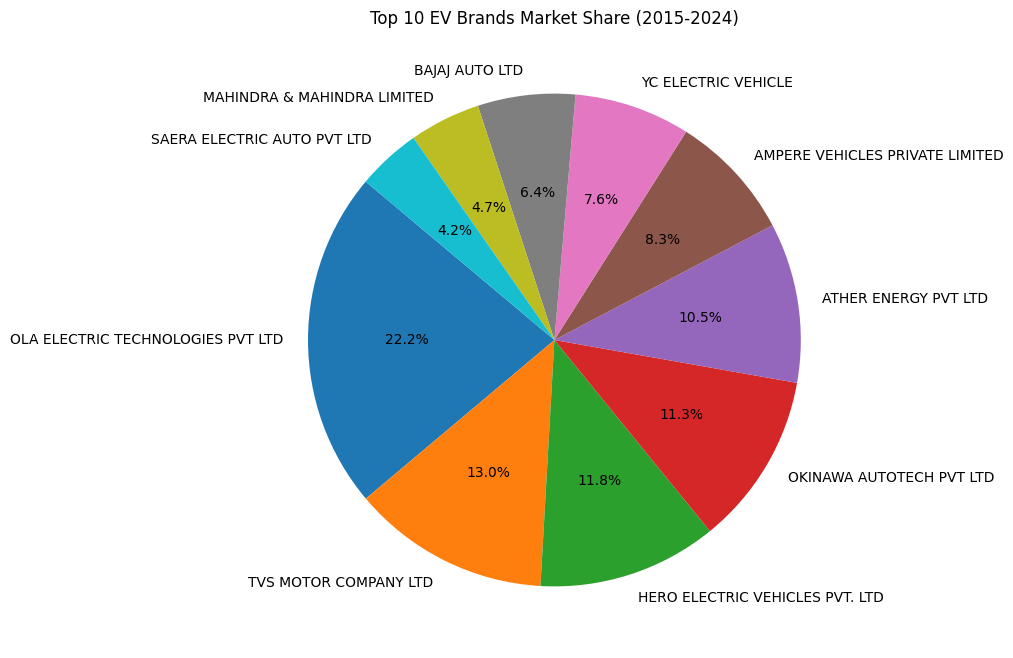

In [24]:
# Top 10 Makers
grouped_top = df_melted.groupby('Maker')['Number_of_Vehicles'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
plt.pie(grouped_top, labels=grouped_top.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 EV Brands Market Share (2015-2024)')
plt.show()

In [25]:
import plotly.express as px

# Summarize the data
grouped = df_melted.groupby(['Cat', 'Maker'])['Number_of_Vehicles'].sum().reset_index()

fig = px.treemap(grouped, path=['Cat', 'Maker'], values='Number_of_Vehicles',
                 title='EV Distribution Treemap by Category and Brand')
fig.show()

**Market segementation model building using K- means clustering**

In [26]:
# Pivot correctly
pivot_df = df_melted.pivot_table(index=['Maker', 'Cat'],
                          columns='Year',
                          values='Number_of_Vehicles',
                          fill_value=0)

# Reset index properly
pivot_df = pivot_df.reset_index()

# Now pivot_df is clean!
print(pivot_df.head())

Year                          Maker Cat  2015  2016  2017  2018  2019  2020  \
0       "VOLVO GROUP INDIA PVT LTD"  3W   0.0   0.0  31.0  12.0   0.0   0.0   
1            3EV INDUSTRIES PVT LTD  3W   0.0   0.0   0.0   0.0   0.0   0.0   
2            3GB TECHNOLOGY PVT LTD  2W   0.0   0.0   0.0   1.0   0.0   0.0   
3            3GB TECHNOLOGY PVT LTD  3W   0.0   1.0   1.0   0.0   0.0   0.0   
4     3S INDUSTRIES PRIVATE LIMITED  3W   0.0   0.0   0.0   0.0  48.0  66.0   

Year   2021   2022   2023  
0       0.0    0.0    0.0  
1     112.0  390.0  545.0  
2       0.0    0.0    0.0  
3       0.0    0.0    0.0  
4      43.0   68.0  266.0  


In [27]:
# If somehow 'Year' column exists wrongly, drop it
if 'Year' in pivot_df.columns:
    pivot_df = pivot_df.drop('Year', axis=1)

In [28]:
print(pivot_df.head())

Year                          Maker Cat  2015  2016  2017  2018  2019  2020  \
0       "VOLVO GROUP INDIA PVT LTD"  3W   0.0   0.0  31.0  12.0   0.0   0.0   
1            3EV INDUSTRIES PVT LTD  3W   0.0   0.0   0.0   0.0   0.0   0.0   
2            3GB TECHNOLOGY PVT LTD  2W   0.0   0.0   0.0   1.0   0.0   0.0   
3            3GB TECHNOLOGY PVT LTD  3W   0.0   1.0   1.0   0.0   0.0   0.0   
4     3S INDUSTRIES PRIVATE LIMITED  3W   0.0   0.0   0.0   0.0  48.0  66.0   

Year   2021   2022   2023  
0       0.0    0.0    0.0  
1     112.0  390.0  545.0  
2       0.0    0.0    0.0  
3       0.0    0.0    0.0  
4      43.0   68.0  266.0  


In [29]:
pivot_df.head()

Year,Maker,Cat,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"""VOLVO GROUP INDIA PVT LTD""",3W,0.0,0.0,31.0,12.0,0.0,0.0,0.0,0.0,0.0
1,3EV INDUSTRIES PVT LTD,3W,0.0,0.0,0.0,0.0,0.0,0.0,112.0,390.0,545.0
2,3GB TECHNOLOGY PVT LTD,2W,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3GB TECHNOLOGY PVT LTD,3W,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3S INDUSTRIES PRIVATE LIMITED,3W,0.0,0.0,0.0,0.0,48.0,66.0,43.0,68.0,266.0


In [30]:
pivot_df = df_melted.pivot_table(index=['Maker', 'Cat'],
                          columns='Year',
                          values='Number_of_Vehicles',
                          fill_value=0)

# Remove the columns' name (which is 'Year')
pivot_df.columns.name = None

pivot_df = pivot_df.reset_index()

In [31]:
pivot_df.head()

,Maker,Cat,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"""VOLVO GROUP INDIA PVT LTD""",3W,0.0,0.0,31.0,12.0,0.0,0.0,0.0,0.0,0.0
1,3EV INDUSTRIES PVT LTD,3W,0.0,0.0,0.0,0.0,0.0,0.0,112.0,390.0,545.0
2,3GB TECHNOLOGY PVT LTD,2W,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3GB TECHNOLOGY PVT LTD,3W,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3S INDUSTRIES PRIVATE LIMITED,3W,0.0,0.0,0.0,0.0,48.0,66.0,43.0,68.0,266.0


In [32]:
# One-hot encode category
pivot_encoded = pd.get_dummies(pivot_df, columns=['Cat'])

# Save makers separately for later
makers = pivot_encoded['Maker']
pivot_encoded = pivot_encoded.drop('Maker', axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_encoded)

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance by PCA components: {pca.explained_variance_ratio_}")

Explained variance by PCA components: [0.34708501 0.19006108]


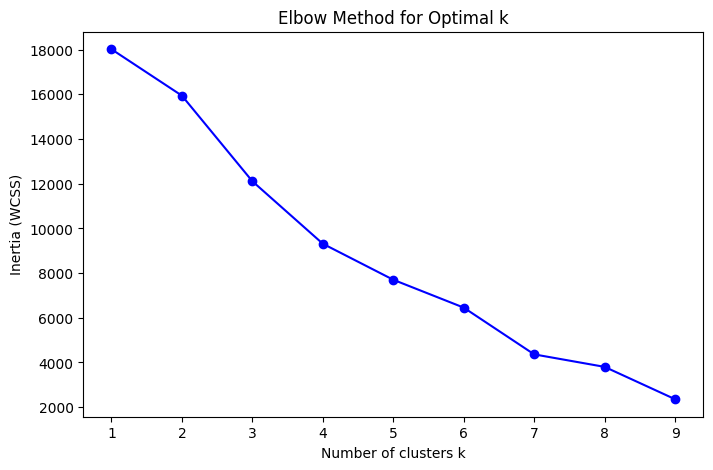

In [34]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Attach cluster labels
pivot_df['Cluster'] = labels

In [36]:
# Save the Maker names
makers = pivot_df['Maker'].values

In [37]:
pivot_df.head()

,Maker,Cat,2015,2016,2017,2018,2019,2020,2021,2022,2023,Cluster
0,"""VOLVO GROUP INDIA PVT LTD""",3W,0.0,0.0,31.0,12.0,0.0,0.0,0.0,0.0,0.0,1
1,3EV INDUSTRIES PVT LTD,3W,0.0,0.0,0.0,0.0,0.0,0.0,112.0,390.0,545.0,1
2,3GB TECHNOLOGY PVT LTD,2W,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,3GB TECHNOLOGY PVT LTD,3W,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,3S INDUSTRIES PRIVATE LIMITED,3W,0.0,0.0,0.0,0.0,48.0,66.0,43.0,68.0,266.0,1


In [38]:
pca_df = pd.DataFrame({
    'Maker': makers,
    'Cluster': labels,
    'PCA1': X_pca[:,0],
    'PCA2': X_pca[:,1]
})

In [39]:
# Find top brands based on total number of vehicles
top_brands = (df_melted.groupby('Maker')['Number_of_Vehicles']
              .sum()
              .sort_values(ascending=False)
              .head(10)
              .index
              .tolist())

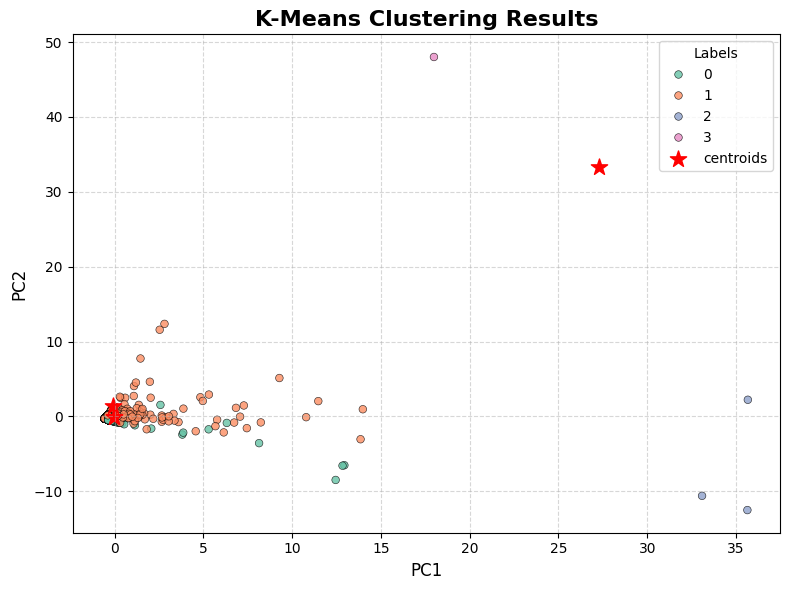

In [40]:



# Create figure
plt.figure(figsize=(8,6))

# Scatter plot of brands colored by cluster
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    data=pca_df,
    s=30,
    alpha=0.8,
    edgecolor='black'
)

# Plot cluster centers (centroids)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red',
    s=150,
    marker='*',
    label='centroids'
)

# Add titles and labels
plt.title('K-Means Clustering Results', fontsize=16, fontweight='bold')
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)

# Improve legend
plt.legend(title='Labels', loc='best')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Final plot
plt.tight_layout()
plt.show()

Now Cluster profiling for clear analysis

In [41]:
# First, let's combine original info back
profile_df = pca_df.copy()

# Merge with original columns like 'Cat', 'Year',
# Example if you had original df as `original_df`
# profile_df = profile_df.merge(original_df[['Maker', 'Cat', 'Year', 'Number of Vehicles']], on='Maker', how='left')

# Group by Cluster
cluster_summary = (profile_df.groupby('Cluster')
                   .agg(
                       Number_of_Brands = ('Maker', 'nunique'),
                       Top_Brands = ('Maker', lambda x: x.value_counts().head(3).index.tolist())
                   )
                   .reset_index())

print(cluster_summary)

   Cluster  Number_of_Brands  \
0        0               259   
1        1               991   
2        2                 3   
3        3                 1   

                                          Top_Brands  
0  [ZHONGXING (IMPORTER:GREENO AUTOMOBILE), 3GB T...  
1  [VE COMMERCIAL VEHICLES LTD, TATA MOTORS LTD, ...  
2  [HERO ELECTRIC VEHICLES PVT. LTD, OKINAWA AUTO...  
3                                           [OTHERS]  


In [42]:
# Vehicle Category Analysis
profile_df = profile_df.merge(pivot_df[['Maker', 'Cat']], on='Maker', how='left') # Add this line back

cat_profile = (profile_df
               .groupby(['Cluster', 'Cat'])
               .size()
               .reset_index(name='Counts')
               .sort_values(['Cluster', 'Counts'], ascending=[True, False]))

print(cat_profile)

    Cluster  Cat  Counts
0         0   2W     259
1         0   3W      48
2         0  LMV      31
3         0  MMV       2
5         1   3W     992
6         1  LMV     373
4         1   2W      83
7         1  MMV      33
9         2   3W       3
8         2   2W       2
10        2  LMV       2
11        3   2W       1
12        3   3W       1
13        3  LMV       1
14        3  MMV       1


<ipython-input-43-bac79b025513>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




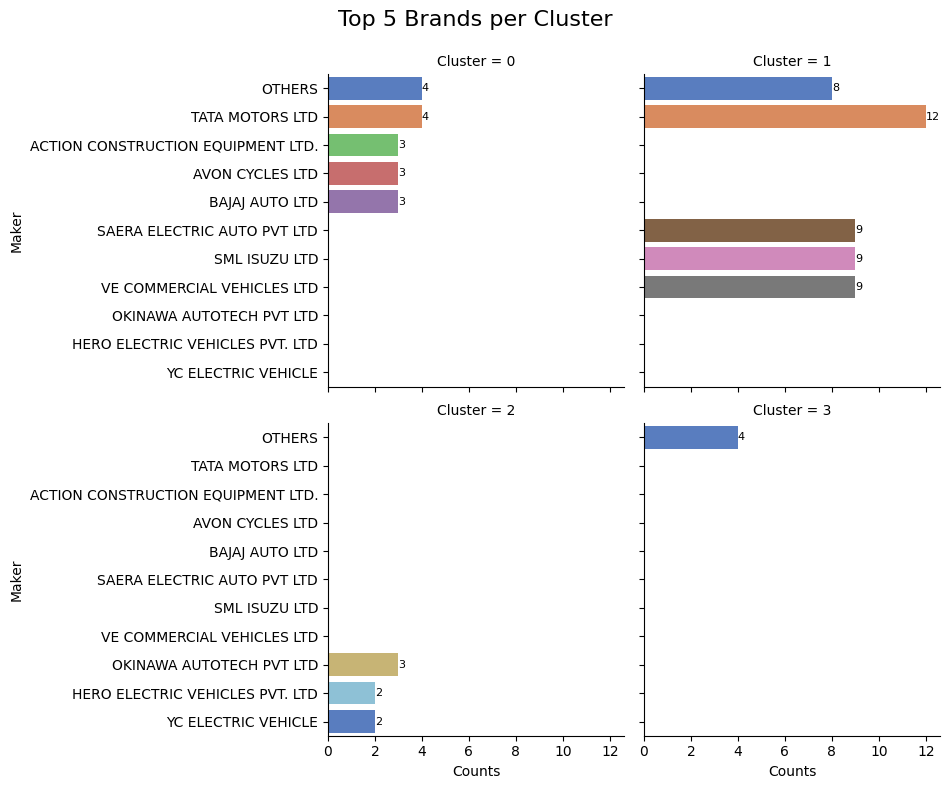

In [43]:


# First, find top brands within each cluster
top_brands_clusterwise = (profile_df.groupby(['Cluster', 'Maker'])
                          .size()
                          .reset_index(name='Counts'))

# Now for each cluster, get Top 5 brands
top5_per_cluster = (top_brands_clusterwise
                    .sort_values(['Cluster', 'Counts'], ascending=[True, False])
                    .groupby('Cluster')
                    .head(5))

# Plot
g = sns.catplot(
    data=top5_per_cluster,
    x='Counts', y='Maker',
    col='Cluster',
    kind='bar',
    col_wrap=2,   # 2 plots per row
    height=4,
    aspect=1.2,
    palette='muted'
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Top 5 Brands per Cluster', fontsize=16)

for ax in g.axes.flatten():
    for c in ax.containers:
        ax.bar_label(c, fmt='%d', label_type='edge', fontsize=8)

plt.show()

<ipython-input-44-5153fa978f04>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




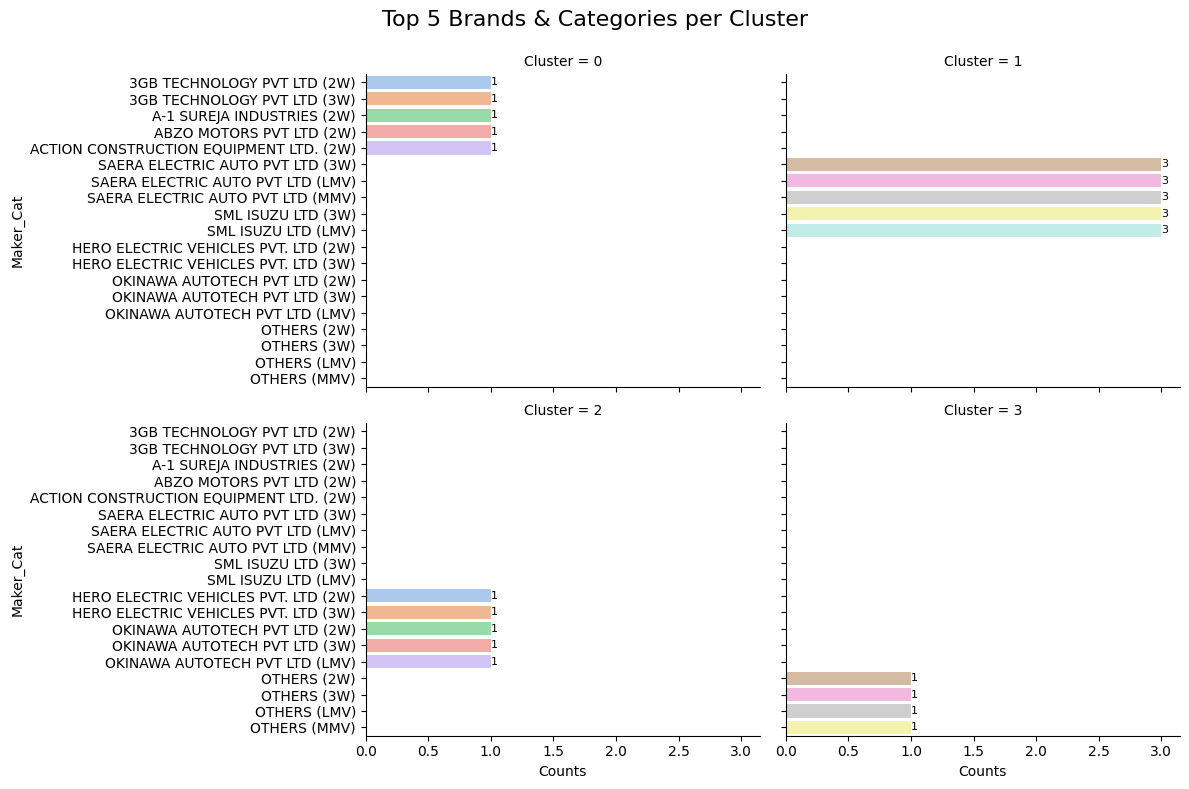

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, create a combined label (Maker + Category)
profile_df['Maker_Cat'] = profile_df['Maker'] + ' (' + profile_df['Cat'] + ')'

# Group by Cluster and Maker_Cat
top_brands_clusterwise = (profile_df.groupby(['Cluster', 'Maker_Cat'])
                          .size()
                          .reset_index(name='Counts'))

# Get Top 5 brands+categories per cluster
top5_per_cluster = (top_brands_clusterwise
                    .sort_values(['Cluster', 'Counts'], ascending=[True, False])
                    .groupby('Cluster')
                    .head(5))

# Plot
g = sns.catplot(
    data=top5_per_cluster,
    x='Counts', y='Maker_Cat',
    col='Cluster',
    kind='bar',
    col_wrap=2,   # 2 plots per row
    height=4,
    aspect=1.5,
    palette='pastel'
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Top 5 Brands & Categories per Cluster', fontsize=16)

for ax in g.axes.flatten():
    for c in ax.containers:
        ax.bar_label(c, fmt='%d', label_type='edge', fontsize=8)

plt.show()

In [45]:
# Step 1: Calculate summary statistics for each cluster
cluster_summary = profile_df.groupby('Cluster').agg({
    'Maker': 'nunique',    # Number of unique brands
    'Cat': lambda x: x.mode()[0],  # Most common vehicle category
    'Cluster': 'count'     # Total number of entries
}).rename(columns={
    'Maker': 'Unique Makers',
    'Cat': 'Dominant Category',
    'Cluster': 'Total Entries'
}).reset_index()

# Step 2: Display the Cluster Profile Table
print(cluster_summary)

# Optional: visualize nicely
import pandas as pd
from tabulate import tabulate

print(tabulate(cluster_summary, headers='keys', tablefmt='pretty', showindex=False))

   Cluster  Unique Makers Dominant Category  Total Entries
0        0            259                2W            340
1        1            991                3W           1481
2        2              3                3W              7
3        3              1                2W              4
+---------+---------------+-------------------+---------------+
| Cluster | Unique Makers | Dominant Category | Total Entries |
+---------+---------------+-------------------+---------------+
|    0    |      259      |        2W         |      340      |
|    1    |      991      |        3W         |     1481      |
|    2    |       3       |        3W         |       7       |
|    3    |       1       |        2W         |       4       |
+---------+---------------+-------------------+---------------+


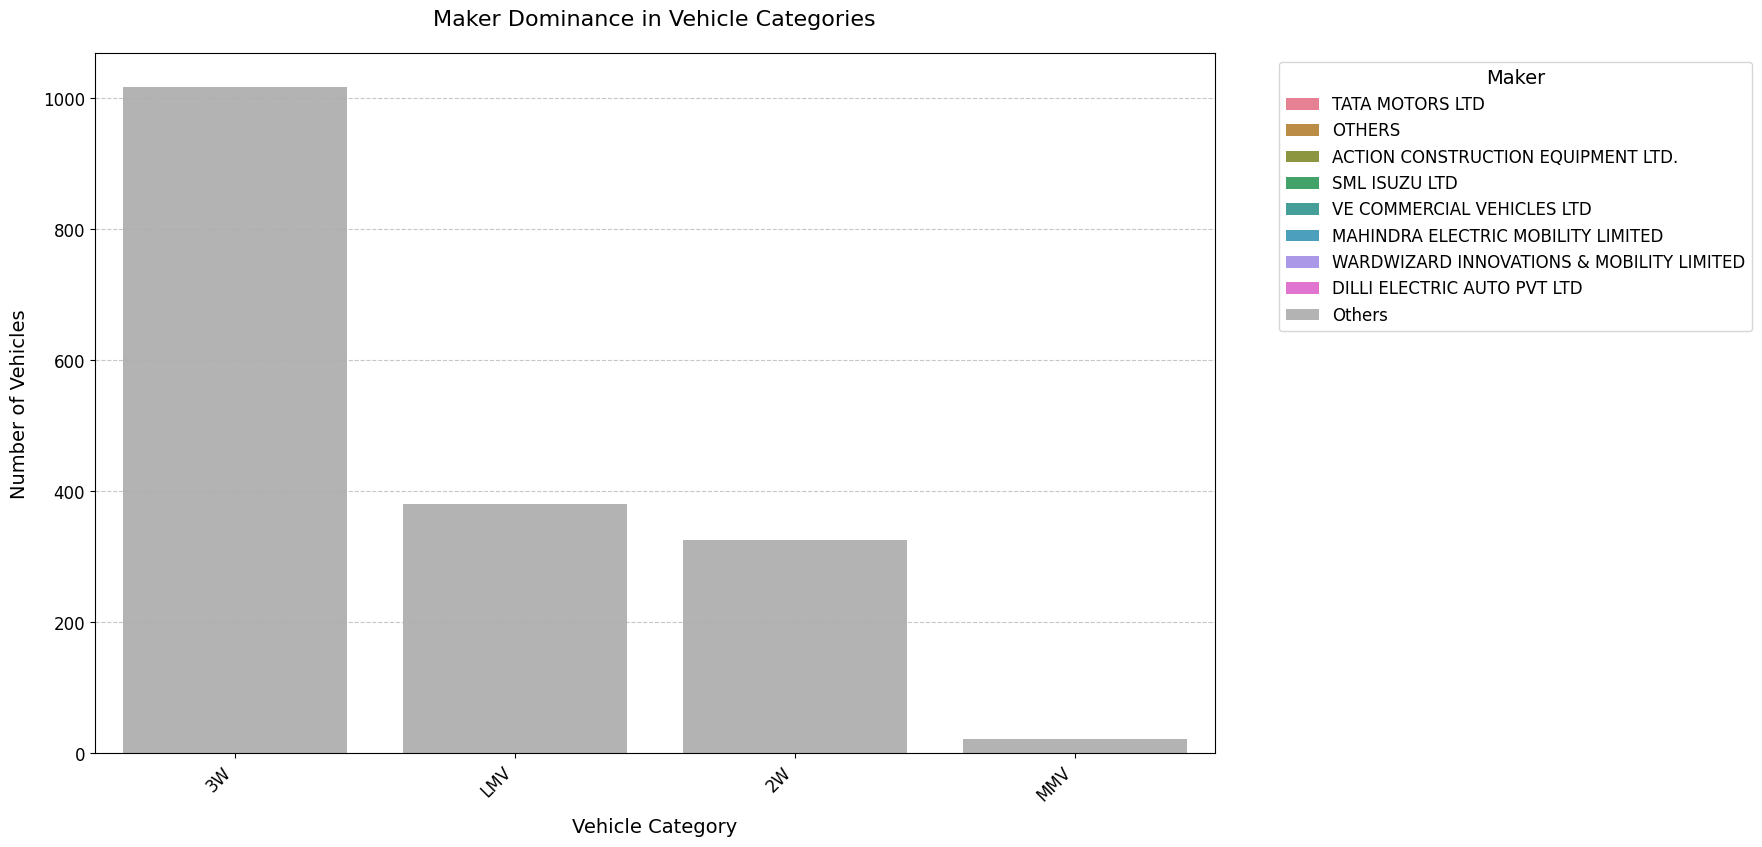

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming profile_df contains your data with 'Maker', 'Cat', and 'Cluster' columns
# In case profile_df was deleted, recreate it from pca_df
profile_df = pca_df.copy()

# Merge with original data to get 'Cat' back if it's missing
profile_df = profile_df.merge(pivot_df[['Maker', 'Cat']], on='Maker', how='left')

# Group by Maker to find the top makers overall
maker_counts = profile_df.groupby('Maker')['Cluster'].count().sort_values(ascending=False)
top_makers = maker_counts.head(8).index.tolist()  # Keep only top 8 makers

# Create a new column to group all other makers as "Others"
profile_df['Maker_Grouped'] = profile_df['Maker'].apply(lambda x: x if x in top_makers else 'Others')

# Group by Category and the new Maker_Grouped column
maker_cat_counts = profile_df.groupby(['Cat', 'Maker_Grouped'])['Cluster'].count().reset_index()

# Find the dominant maker for each category
dominant_makers = maker_cat_counts.loc[maker_cat_counts.groupby('Cat')['Cluster'].idxmax()]

# Sort categories by total count for better visualization
cat_order = profile_df.groupby('Cat')['Cluster'].count().sort_values(ascending=False).index.tolist()

# Create a custom color palette (more distinct colors for top makers)
palette = sns.color_palette("husl", len(top_makers))
palette = palette + [(.7, .7, .7)]  # Grey for "Others"

# Create the stacked bar chart with improved styling
plt.figure(figsize=(16, 10))

# Plot with ordered categories
ax = sns.barplot(
    x='Cat',
    y='Cluster',
    hue='Maker_Grouped',
    data=maker_cat_counts,
    order=cat_order,
    hue_order=top_makers + ['Others'],
    palette=palette,
    dodge=False
)

# Styling improvements
plt.title('Maker Dominance in Vehicle Categories', fontsize=16, pad=20)
plt.xlabel('Vehicle Category', fontsize=14, labelpad=10)
plt.ylabel('Number of Vehicles', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Place legend outside the plot and style it
plt.legend(
    title='Maker',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
    title_fontsize=14,
    frameon=True
)

# Add a text label for only the dominant maker in each category
for i, cat in enumerate(cat_order):
    # Find the dominant maker for this category
    dom_maker = dominant_makers[dominant_makers['Cat'] == cat]['Maker_Grouped'].values
    if len(dom_maker) > 0:
        dom_count = dominant_makers[dominant_makers['Cat'] == cat]['Cluster'].values[0]
        if dom_maker[0] != 'Others':  # Only label if it's not the "Others" category
            plt.text(
                i,
                dom_count/2,  # Positioned in the middle of the segment
                dom_maker[0],
                ha='center',
                va='center',
                fontsize=11,
                fontweight='bold',
                color='white'
            )

# Adjust subplot parameters
plt.subplots_adjust(bottom=0.2, right=0.8, top=0.9, left=0.1)

# Add a grid for better readability of values
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.show()